### Quick Start Hive Plots

This page serves as a quick reference for generating and visualizing hive plots using `hiveplotlib.hive_plot_n_axes()` and `hiveplotlib.viz.hive_plot_viz()`.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from hiveplotlib import hive_plot_n_axes
from hiveplotlib.converters import networkx_to_nodes_edges
from hiveplotlib.node import split_nodes_on_variable
from hiveplotlib.viz import hive_plot_viz

#### Before Plotting: Nodes, Edges, and Setting a Node Partition

Before we can visualize anything, we need to gather up:

* A list of `Node` instances
* An `(n, 2)` `numpy` array of edges, and 
* A list of lists of node IDs to partition our nodes onto each axis.

Below, we will create a toy example using a Stochastic Block Model with `networkx`. This model allows us to generate multiple "cliques" and assign probabilities that decide the extent to which these cliques interact with each other.

In [2]:
G = nx.stochastic_block_model(
    sizes=[10, 10, 10],
    p=[[0.1, 0.5, 0.5], [0.05, 0.1, 0.2], [0.05, 0.2, 0.1]],
    directed=True,
    seed=0,
)

Above, we have generated 3 cliques of equal size (10 per clique) with the following properties:

* Within-group communication is only 10% (`0.1` on the diagonal).
* Group 1 is very social with Groups 2 and 3 (`0.5`), but Groups 2 and 3 aren't very social with Group 1 (`0.05`).
* Group 2 and Group 3 are relatively social with each other (`0.2`).

Let's first set up our nodes and edges.

In [3]:
nodes, edges = networkx_to_nodes_edges(G)

In [4]:
nodes[:5]

[hiveplotlib.Node 0,
 hiveplotlib.Node 1,
 hiveplotlib.Node 2,
 hiveplotlib.Node 3,
 hiveplotlib.Node 4]

In [5]:
edges[:5, :]

array([[ 0, 10],
       [ 0, 12],
       [ 0, 13],
       [ 0, 14],
       [ 0, 15]])

Next, let's set up the partition of nodes. We will split the node IDs by their block assignment (their IDs are just integers from `0` to `29`).

In [6]:
blocks_dict = split_nodes_on_variable(nodes, variable_name="block")
blocks_dict

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 1: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 2: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}

The `dict` structure is a useful reference if we want to know which node IDs correspond to which `block`, but we will need a list of lists for the partition when we call `hiveplotlib.hiveplot_n_axes()`

In [7]:
splits = list(blocks_dict.values())
splits

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]

Lastly, we need a scalar value for each node by which to place the nodes on each axis. For this example, we're mainly concerned with the number of edges between axes as opposed to any patterns of edges _along_ a given axis, so we will spoof a value here with a random variable.

For an example where we use an explicit _sorting variable_ to make visual inferences, see the [Zachary's Karate Club example notebook](https://geomdata.gitlab.io/hiveplotlib/karate_club.html). 

In [8]:
# not concerned with on-axis patterns, place nodes on axes randomly
rng = np.random.default_rng(0)
for node in nodes:
    node.add_data(data={"val": rng.uniform()})

#### Base Hive Plot Visualization

With setup now complete, we can begin to generate hive plots. Let's start with the simplest visualization, following defaults.

In [9]:
hp = hive_plot_n_axes(
    node_list=nodes, edges=edges, axes_assignments=splits, sorting_variables=["val"] * 3
)

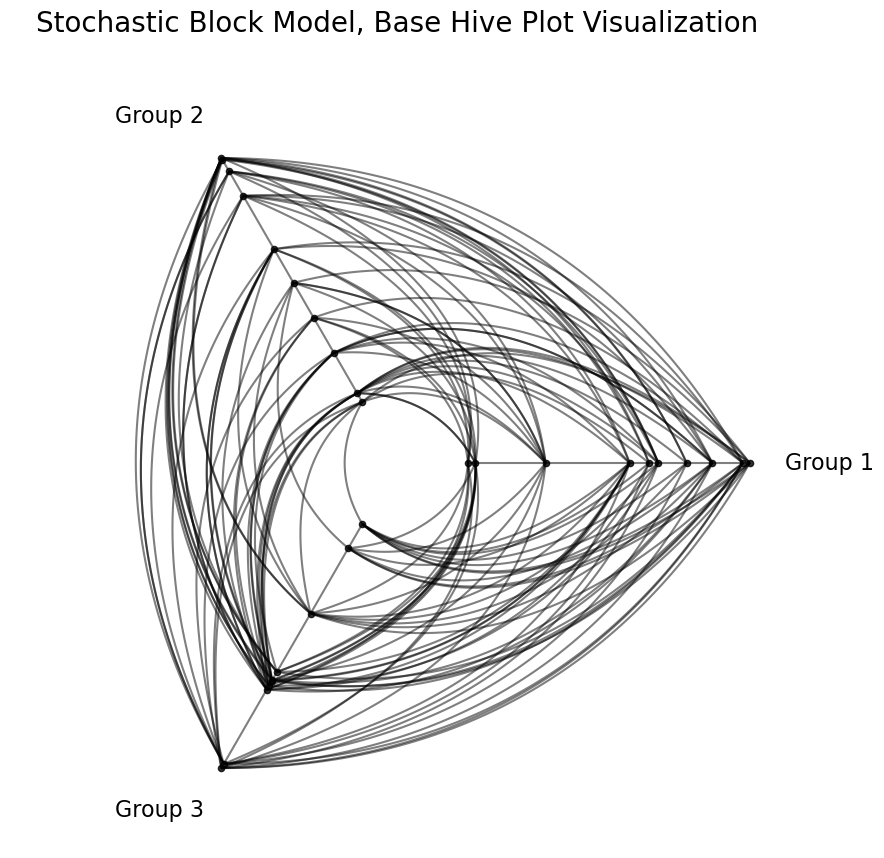

In [10]:
fig, ax = hive_plot_viz(hp)
ax.set_title("Stochastic Block Model, Base Hive Plot Visualization", y=1.05, size=20)
plt.show()

We can also change edge, node, and axis kwargs from this visualization function.

In [11]:
fig, ax = hive_plot_viz(
    hp,
    node_kwargs={"color": "C1", "s": 80},
    axes_kwargs={"color": "none"},
    color="C0",
    ls="dotted",
)
ax.set_title("Stochastic Block Model, Changing Kwargs in Viz Function", y=1.05, size=20)
plt.show()

From this base visualization, we cannot yet see any of the 3 main relationships we contrived.

To see the relationships we predetermined when constructing our Stochastic Block Model, we need to take advantage of some additional kwargs in `hiveplotlib.hive_plot_n_axes()`.

#### all_edge_kwargs, repeat_axes, and repeat_edge_kwargs

First, we can't see our _within-group_ relationships with this figure. To see these, we need to draw _repeat axes_ for the above figure. This capability is nicely exposed in `hiveplotlib.hive_plot_n_axes()` with the `repeat_axes` parameter.

Furthermore, we can distinguish intra-group edges from inter-group edges in the final visualization with a couple of additional parameters. Using the `repeat_edge_kwargs` parameter, we can highlight the intra-group edges. We can also improve the contrast between these two sets of edges by setting the default edge color to a more modest gray using `all_edge_kwargs`.

In [12]:
# turning repeat axes on for all 3 groups
hp = hive_plot_n_axes(
    node_list=nodes,
    edges=edges,
    axes_assignments=splits,
    sorting_variables=["val"] * 3,
    repeat_axes=[True, True, True],
    all_edge_kwargs={"color": "darkgrey"},
    repeat_edge_kwargs={"color": "C0"},
)

/tmp/ipykernel_349422/1701766974.py:2: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(
/tmp/ipykernel_349422/1701766974.py:2: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(
/tmp/ipykernel_349422/1701766974.py:2: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(


In [13]:
fig, ax = hive_plot_viz(hp)

fig.text(0.12, 0.95, "Less", ha="left", va="bottom", fontsize=20, color="black")
fig.text(
    0.19,
    0.95,
    "intra-group activity",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C0",
)
fig.text(0.5, 0.95, "relative to", ha="left", va="bottom", fontsize=20, color="black")
fig.text(
    0.65,
    0.95,
    "inter-group activity",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="darkgrey",
)
plt.show()

With the relatively limited _intra-group_ activity now exposed, we turn next to the visualization of _inter-group_ behaviors.

#### Clockwise / Counterclockwise Edge Kwargs

We have contrived some specific asymmetries in this _directed_ graph, but we're currently drawing _undirected_ edges.

In an exploration of directed graphs, one will likely be interested in visualizing the _direction_ of edges. The quickest way to do this in `hiveplotlib` is to contrast the styles of edges that are drawn _clockwise vs. counterclockwise_. These edges can quickly be modified through the `cw_edge_kwargs` and `ccw_edge_kwargs` parameters, respectively.

In [14]:
# modify cw and ccw edges
hp = hive_plot_n_axes(
    node_list=nodes,
    edges=edges,
    axes_assignments=splits,
    sorting_variables=["val"] * 3,
    repeat_axes=[True, True, True],
    repeat_edge_kwargs={"color": "darkgrey"},
    cw_edge_kwargs={"color": "C0"},
    ccw_edge_kwargs={"color": "C1"},
)

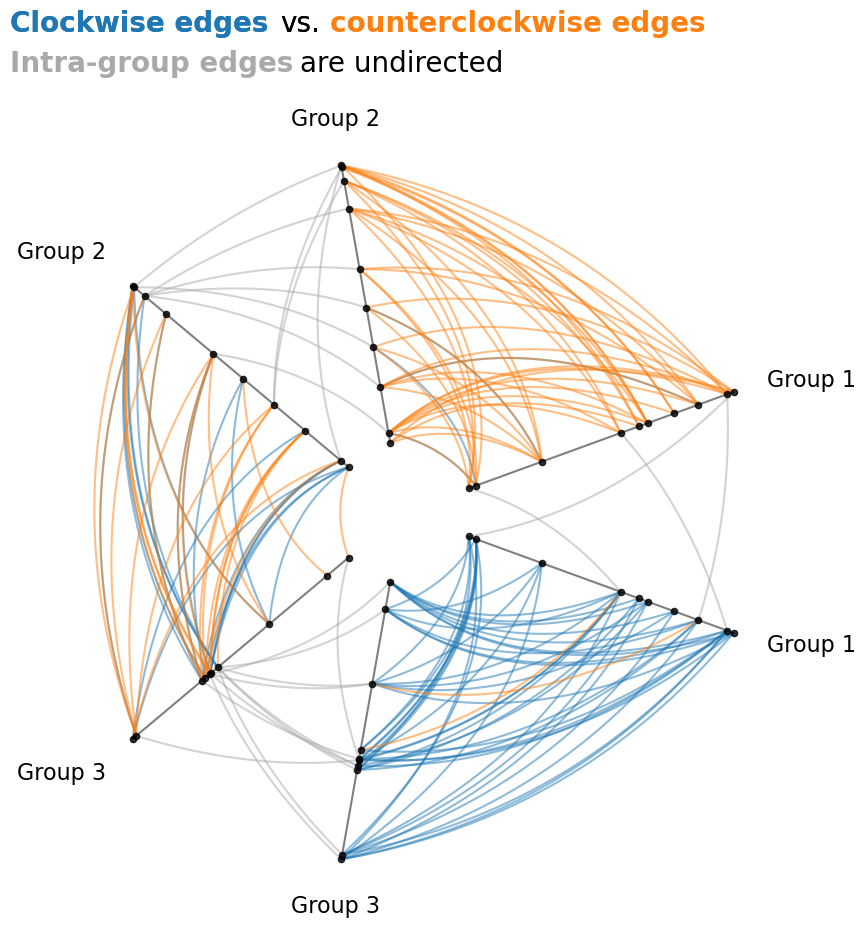

In [15]:
fig, ax = hive_plot_viz(hp)

fig.text(
    0.12,
    0.97,
    "Clockwise edges",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C0",
)
fig.text(0.39, 0.97, "vs.", ha="left", va="bottom", fontsize=20, color="black")
fig.text(
    0.44,
    0.97,
    "counterclockwise edges",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C1",
)

fig.text(
    0.12,
    0.97,
    "Clockwise edges",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C0",
)
fig.text(0.39, 0.97, "vs.", ha="left", va="bottom", fontsize=20, color="black")

fig.text(
    0.12,
    0.93,
    "Intra-group edges",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="darkgrey",
)
fig.text(
    0.41, 0.93, "are undirected", ha="left", va="bottom", fontsize=20, color="black"
)
plt.show()

Note here that the _intra-group_ kwargs are independently dictated by `repeat_edge_kwargs`, unaffected by both `cw_edge_kwargs` and `ccw_edge_kwargs`. The reason for this is that, even though these edges are also directed, it would be correct to draw these edges clockwise _OR_ counterclockwise, whereas our _inter-group_ edges are well-defined in only one direction by the positioning of our axes.

If we were performing an exploratory data analysis, the figure above would have nicely exposed the asymmetric behavior involving Group 1. That being said, having now "discovered" this asymmetry, as we turn to a more visually interpretable, _explanatory_ visualization, we'll want to revise our color scheme with some custom kwargs to better portray this asymmetry to an audience.

#### Custom Kwargs for Different Sets of Edges

To draw out this asymmetric relationship between groups, we will highlight the edges _from_ Group 1 to Groups 2 and 3.

The easiest way to do that will be to modify those edge kwargs directly with the `add_edge_kwargs()` method. We need to be a little bit careful though, as we have repeat axes that have unique names in the underlying `HivePlot` instance.

In [16]:
hp.axes

{'Group 1': hiveplotlib.Axis Group 1,
 'Group 1_repeat': hiveplotlib.Axis Group 1_repeat,
 'Group 2': hiveplotlib.Axis Group 2,
 'Group 2_repeat': hiveplotlib.Axis Group 2_repeat,
 'Group 3': hiveplotlib.Axis Group 3,
 'Group 3_repeat': hiveplotlib.Axis Group 3_repeat}

Starting from `Group 1`, the axes names above are placed in counterclockwise order. The relationships we thus want to highlight are:

`Group 1_repeat` $\rightarrow$ `Group 2`

and

`Group 1` $\rightarrow$ `Group 3_repeat`

Note, since we only want to highlight the relationships _from_ Group 1, we will need to add edge kwargs in a single direction, which we will do by including `a2_to_a1=False` below.

In [17]:
hp = hive_plot_n_axes(
    node_list=nodes,
    edges=edges,
    axes_assignments=splits,
    sorting_variables=["val"] * 3,
    repeat_axes=[True, True, True],
    all_edge_kwargs={"color": "C1", "alpha": 1},
    repeat_edge_kwargs={"color": "darkgrey"},
)

/tmp/ipykernel_349422/576324277.py:1: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(
/tmp/ipykernel_349422/576324277.py:1: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(
/tmp/ipykernel_349422/576324277.py:1: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(


In [18]:
# make all the edges of interest blue (C0)
#  make more transparant (lots of edges)
#  and place these edges *behind* orange edges (zorder)
hp.add_edge_kwargs(
    axis_id_1="Group 1_repeat",
    axis_id_2="Group 2",
    a2_to_a1=False,
    color="C0",
    alpha=0.6,
    zorder=-1,
)
hp.add_edge_kwargs(
    axis_id_1="Group 1",
    axis_id_2="Group 3_repeat",
    a2_to_a1=False,
    color="C0",
    alpha=0.6,
    zorder=-1,
)

In [19]:
fig, ax = hive_plot_viz(hp)

fig.text(
    0.12,
    1.01,
    "Group 1",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C0",
)
fig.text(
    0.25,
    1.01,
    "is asymmetrically social with",
    ha="left",
    va="bottom",
    fontsize=20,
    color="black",
)
fig.text(
    0.66,
    1.01,
    "Groups 2 and 3",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C1",
)

fig.text(
    0.12,
    0.97,
    "Groups 2 and 3",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C1",
)
fig.text(
    0.37,
    0.97,
    "are relatively social with each other",
    ha="left",
    va="bottom",
    fontsize=20,
    color="black",
)

fig.text(
    0.12,
    0.93,
    "Intra-group Activity",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="darkgrey",
)
fig.text(
    0.44,
    0.93,
    "is minimal for all groups",
    ha="left",
    va="bottom",
    fontsize=20,
    color="black",
)

plt.show()

Now we can see that the overwhelming majority of edges between Group 1 and Groups 2 and 3 are coming _from_ Group 1, with only a few orange edges going _to_ Group 1. Furthermore, we can see that there is still an abundance of orange edges _between_ Groups 2 and 3.

#### Edge List Kwargs: Comparing Network Subgroups

We did not touch on the `edge_list_kwargs` parameter here. This parameter exists primarily to allow for a comparison between different _subgroups_ of a network in a single hive plot. For more on this use case, see our toy example in the [Comparing Network Subgroups notebook](https://geomdata.gitlab.io/hiveplotlib/comparing_network_subgroups.html#).

#### A Note On Kwarg Hierarchies

As you have likely noticed in this notebook, there are several warnings along the lines of "this kwarg was already set by another parameter, so kwarg will be disregarded."

With all the available parameters through which one can alter edge kwargs, there is an established _hierarchy_ by which these edge kwargs overwrite each other.

The highest priority edge kwargs are `edge_list_kwargs`, with the idea here being that if one adds a distinct subgroup of edges to visually compare, their visual distinctness must take priority.

`cw_edge_kwargs`, `ccw_edge_kwargs`, and `repeat_edge_kwargs` are next in the hierarchy. These sets of kwargs are all equal in the hierarchy, as any combination of these parameters can never affect an overlapping set of edges.

Finally, at lowest priority is `all_edge_kwargs`, which, as the name suggests, will change the kwargs of _every_ edge. A common use case for this would be if one were generating a hive plot with a lot of edges, one may choose to draw all edges with a smaller line width or make the edges more transparent.

Note, if the kwargs provided to each parameter don't overlap, no warning will arise.

If one desires specific kwarg changes on an existing `HivePlot` instance, there is an overwriting mechanism available though through the `add_edge_kwargs()` method. As this is _explicitly_ called by the user, the code trusts the user is sure about overwriting kwargs, and does so without any warnings.

In the above figure, we took advantage of this hierarchy in two ways. We wanted to disentangle:

* Intra-group vs inter-group edges
* Inter-group edges coming _from_ Group 1 vs all other inter-group edges

For intra-group vs inter-group edges, we used the parameter hierarchy. By setting `all_edge_kwargs` color to orange and `repeat_edge_kwargs` color to gray, we were able to change all edges from their default black while also fully distinguishing these two sets of edges. This caused an expected warning though, declaring that the `repeat_edge_kwargs` color was prioritized over the `all_edge_kwargs` color for the intra-group edges.

To single out inter-group edges coming _from_ Group 1 from the other inter-group edges, we needed to explictly overwrite those specific edges with the `add_edge_kwargs()` method, which runs without warning as expected.

There is one other place where edge kwargs can be modified, which is through the `hiveplotlib.viz.hive_plot_viz()` call. These kwargs are always deprioritized relative to any formally set kwargs with the above parameters.

Let's demonstrate this deprioritized behavior with the previous figure, where we have modified the color on _every_ edge kwarg. By trying to passively modify all of the edge colors in the viz call, we will trigger warnings for every direction of edges, with a note in each warning that our request for a color change has been ignored.

/home/gary.koplik/repos/hiveplotlib/src/hiveplotlib/viz/matplotlib.py:521: UserWarning: Specified kwarg color but already set as kwarg for edge tag 0 going from edges Group 1 to Group 1_repeat. Preserving kwargs already set.
(These kwargs can be changed using the `add_edge_kwargs()` method for your `HivePlot` instance)
  edge_viz(instance=hive_plot, fig=fig, ax=ax, tags=tags, **edge_kwargs)
/home/gary.koplik/repos/hiveplotlib/src/hiveplotlib/viz/matplotlib.py:521: UserWarning: Specified kwarg color but already set as kwarg for edge tag 0 going from edges Group 1 to Group 3_repeat. Preserving kwargs already set.
(These kwargs can be changed using the `add_edge_kwargs()` method for your `HivePlot` instance)
  edge_viz(instance=hive_plot, fig=fig, ax=ax, tags=tags, **edge_kwargs)
/home/gary.koplik/repos/hiveplotlib/src/hiveplotlib/viz/matplotlib.py:521: UserWarning: Specified kwarg color but already set as kwarg for edge tag 0 going from edges Group 2 to Group 1_repeat. Preserving kwargs 

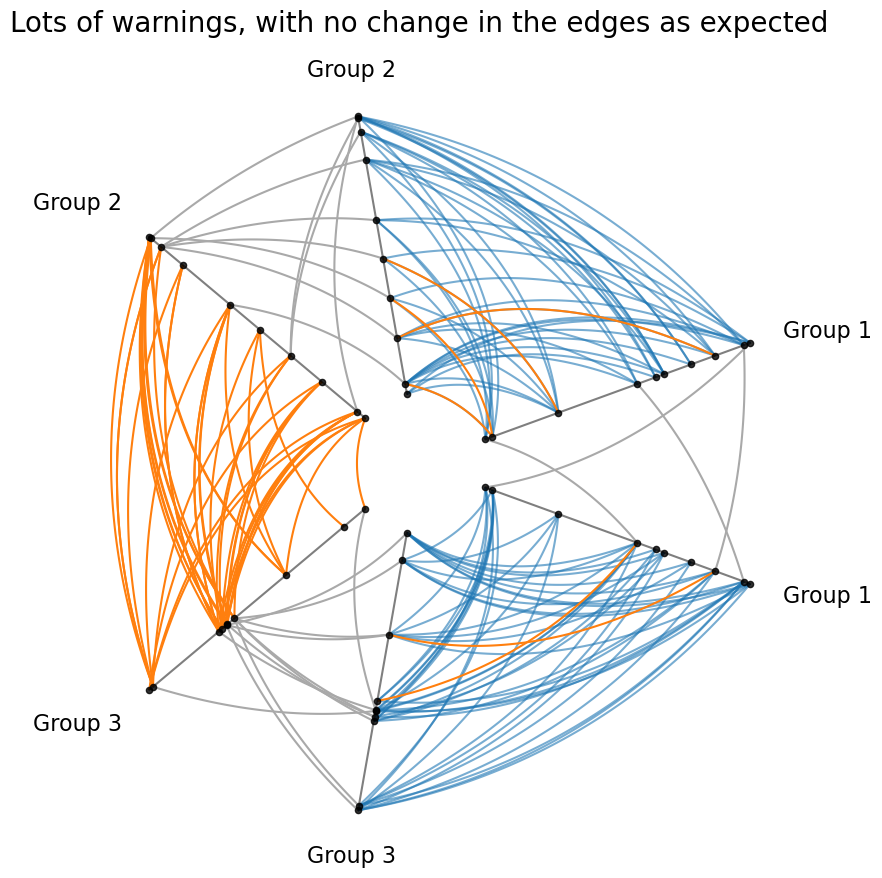

In [20]:
fig, ax = hive_plot_viz(hp, color="black")

ax.set_title(
    "Lots of warnings, with no change in the edges as expected", size=20, y=1.05
)

plt.show()

We could, however, change a kwarg that is _independent_ of any previously set kwargs:

In [21]:
fig, ax = hive_plot_viz(hp, lw=0.5)

ax.set_title(
    "New, but non-overlapping kwarg\n" "Change accepted without warning",
    size=20,
    y=1.05,
)

plt.show()